<a href="https://colab.research.google.com/github/nickdhollman/MS-BAnDS-Google-Colab/blob/BAN-5743-Predictive-Analytics/Neural_Network_Multi_Layer_Perception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MULTI-LAYER PERCEPTION LEARNING
###### TUTORIAL: https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow/

In [ ]:
# Importing necessary modules
#!pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### LOAD AND NORMALIZE IMAGE DATA

In [ ]:
# Normalize image pixel values by dividing by 255 (grayscale)
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

# Checking the shape of feature and target matrices
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


### VISUALIZE DATA

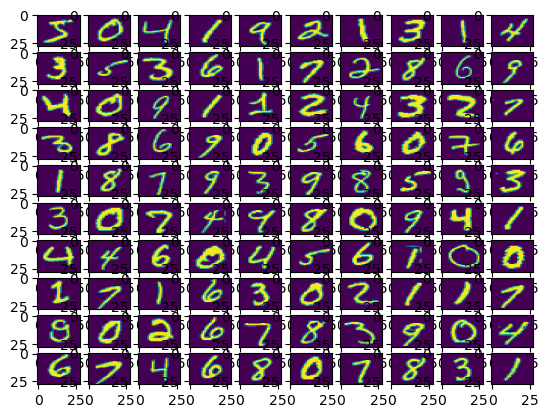

In [ ]:
# Visualizing 100 images from the training data
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
plt.show()

### BUILDING THE NEURAL NETWORK MODEL

In [ ]:
# Building the Sequential neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax'),
])

C:\Users\nickd\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### COMPILING THE MODEL

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### TRAINING THE MODEL

In [ ]:
# Training the model with training data
history = model.fit(x_train, y_train, epochs=10,
                    batch_size=2000,
                    validation_split=0.2)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9161 - loss: 0.3004 - val_accuracy: 0.9248 - val_loss: 0.2711
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9221 - loss: 0.2806 - val_accuracy: 0.9274 - val_loss: 0.2588
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9257 - loss: 0.2651 - val_accuracy: 0.9302 - val_loss: 0.2483
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9293 - loss: 0.2536 - val_accuracy: 0.9317 - val_loss: 0.2387
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9313 - loss: 0.2398 - val_accuracy: 0.9354 - val_loss: 0.2293
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9336 - loss: 0.2335 - val_accuracy: 0.9359 - val_loss: 0.2228
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9382 - loss: 0.2177 - val_accuracy: 0.9402 - val_loss: 0.2135
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9396 - loss: 0.2138 - val_accuracy: 0.9417 - v

#### EVALUATING THE MODEL

In [ ]:
# Evaluating the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

Test loss, Test accuracy: [0.29322150349617004, 0.9179999828338623]


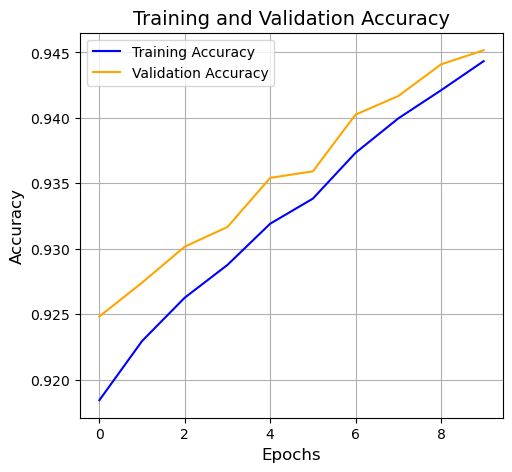

In [ ]:
# Visualization of Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 5))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

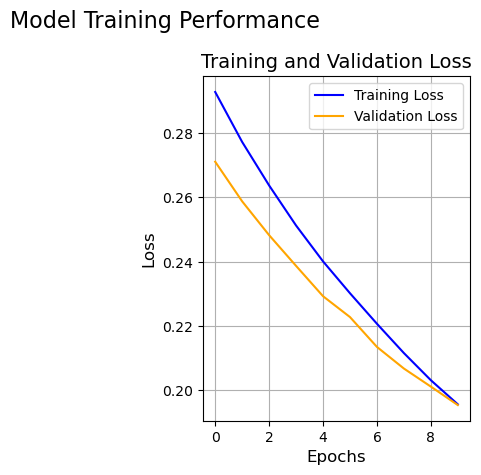

In [ ]:
# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()